# The Sparks Foundation
## Data Science and Business Analytics Internship : Feb 2021
### By Vaishnavi Singh
## Task 1 : Prediction using Supervised ML
## Objective : To predict the percentage score of a student based on their hours of study     

## 1. Data Processing 

#### - Importing all necessary libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

##### ⚫reading the data from the given URL as a csv file


In [16]:
data = pd.read_csv('http://bit.ly/w-data')
print('Data retrieved succesfully')

Data retrieved succesfully


##### ⚫looking at the first 10 observations in the dataset

In [17]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


##### ⚫checking if our dataset contains any null value

In [18]:
if(data.isna().sum().any()==0):
    print('Data contains no missing values!')
else:
    print('Data contains missing values!')

Data contains no missing values!


## 2. Visualising the data

#### - making basic scatterplot to see if our variables in the dataframe contains any kind of correlation

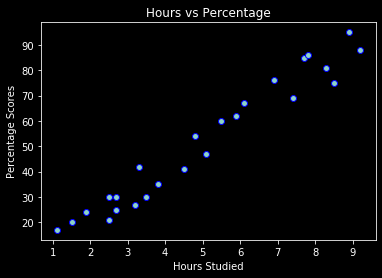

In [14]:
with plt.style.context('dark_background'):
    plt.scatter(x = 'Hours', y = 'Scores', edgecolors = 'blue', data = data)
    plt.title('Hours vs Percentage')
    plt.xlabel('Hours Studied')
    plt.ylabel('Percentage Scores')
plt.show()

#### From the visualisation above we can clearly notice a positive correlation between the variables. So,  we can fit a straight line passing through the datapoints which best fits the data in the sense of having minimum Sum Squared Error.

### 3. Preparing the data for modelling

#### ⚫extracting X and Y from the dataframe for modelling

In [19]:
x = data['Hours'].values.reshape(-1,1)
y = data['Scores']

#### ⚫splitting the whole data into training and testing data

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 108)


## 4.Training the Model

#### ⚫fitting linear regression model to the training dataset

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

print('Model trained successfully!')

Model trained successfully!


#### ⚫plotting the regresssion line

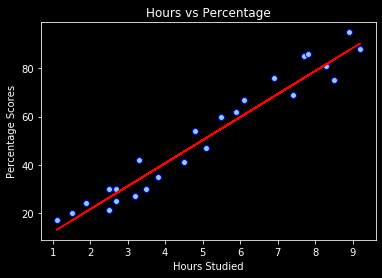

In [24]:
line = model.coef_*x+model.intercept_

with plt.style.context('dark_background'):
    plt.scatter(x, y,edgecolors = 'blue')
    plt.title('Hours vs Percentage')
    plt.xlabel('Hours Studied')
    plt.ylabel('Percentage Scores')
    plt.plot(x, line,'r');
plt.show()

## 5. Using the model for prediction

#### ⚫using testing data for making prediction from model

In [25]:
y_pred = model.predict(x_test)
print('Made prediction using x_test')

Made prediction using x_test


#### ⚫comparing actual scores with predicted scores

In [26]:
df = pd.DataFrame({'Actual Scores': y_test, 'Predicted Scores': y_pred}) 
df


,Actual Scores,Predicted Scores
10,85,76.039921
21,54,48.304669
24,86,76.996309
5,20,16.743865
20,30,28.220521


#### ⚫Predicting with certain choosen value

In [28]:
#let
hours = 6.5
#then our prediction for score from the model will be
pred_score = model.predict([[hours]])
print(f"If a student studied {hours} hours the his/her expected score is {round(pred_score[0],2)}")

If a student studied 6.5 hours the his/her expected score is 64.56


In [ ]:
6.Evaluating the model on testing data

In [29]:
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('Mean Absolute Error:', 
      mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', 
      mean_squared_error(y_test, y_pred)) 
print('Coefficient of determination (R-2 score) :', 
      r2_score(y_test, y_pred))

Mean Absolute Error: 5.738943202979528
Mean Squared Error: 41.51104665813455
Coefficient of determination (R-2 score) : 0.9440853358591937


In [ ]:
### So our linear regression model seems a very good fit to the data as it has coefficient of determinantion of 0.94; i.e. 94% of the variability in y(percentage scores) has been explained by x(hours of study)